In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
dataset = sns.load_dataset("diamonds")

In [7]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
data = dataset.drop(['depth','cut','clarity','color','x','y','z'],axis=1)    

In [10]:
data

,carat,table,price
0,0.23,55.0,326
1,0.21,61.0,326
2,0.23,65.0,327
3,0.29,58.0,334
4,0.31,58.0,335
...,...,...,...
53935,0.72,57.0,2757
53936,0.72,55.0,2757
53937,0.70,60.0,2757
53938,0.86,58.0,2757


In [11]:
x = data.iloc[:,1:3].values.reshape(-1,2)
y = data.iloc[:,0].values.reshape(-1,1)

In [12]:
x

array([[  55.,  326.],
       [  61.,  326.],
       [  65.,  327.],
       ...,
       [  60., 2757.],
       [  58., 2757.],
       [  55., 2757.]])

In [13]:
y

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(43152, 2)

In [17]:
x_test.shape

(10788, 2)

In [18]:
y_train.shape

(43152, 1)

In [19]:
y_test.shape

(10788, 1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=lm.predict(x_test)

In [24]:
y_pred

array([[0.85024907],
       [1.0480669 ],
       [0.97710598],
       ...,
       [0.75401896],
       [1.25164116],
       [0.58686353]])

In [25]:
check=pd.DataFrame(y_test,columns=['Actual price'])

In [26]:
check['Predicaed pice']=y_pred

In [27]:
check

,Actual price,Predicaed pice
0,1.10,0.850249
1,1.29,1.048067
2,1.20,0.977106
3,1.50,1.302870
4,0.90,0.852493
...,...,...
10783,0.52,0.504500
10784,0.91,0.794202
10785,1.08,0.754019
10786,1.02,1.251641


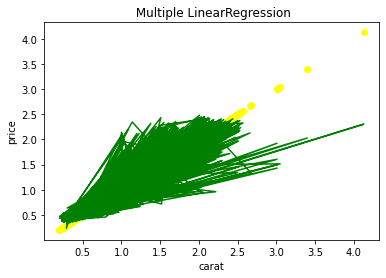

In [34]:
plt.scatter(y_test,y_test,color='yellow')
plt.plot(y_test,y_pred,color='green')
plt.title(' Multiple LinearRegression')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [36]:
mean_squared_error(y_test,y_pred)

0.03210085270974099

In [37]:
mean_absolute_error(y_test,y_pred)

0.13084240614576348

In [38]:
r2_score(y_test,y_pred)

0.8552595341710661